In [1]:
from pymongo import MongoClient
import re
import requests
import json
from getpass import getpass
import time
from dotenv import load_dotenv
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd
import os
import matplotlib.pyplot as plt

import src.mongos as mo
import src.foursquare as fq
import src.maps as mp

# MONGO DB

In [2]:
c = mo.mongo_access("Ironhack", "companies")

In [3]:
df= mo.mongo_design_query(c)

In [4]:
df,cities = mo.cleaning_df(df)

In [5]:
df.head()

,name,category_code,tag_list,description,total_money_raised,offices,city,state_code
0,Pumant,software,"software-development, programmers, designers, ...",None,$1.2M,"[{'description': 'International Office', 'addr...","Birmingham ,Buenos Aires ,","None ,None ,"
1,99designs,design,"graphic-design, crowdsourcing, online-marketpl...",Online graphic design marketplace,$35M,"[{'description': 'United States (HQ)', 'addres...","San Francisco ,Collingwood ,Berlin ,","CA ,None ,None ,"
2,Sitemasher,enterprise,"website-design-and-management-platform, saas",,C$5M,"[{'description': '', 'address1': 'Suite 200', ...","Vancouver ,Coral Gables ,","None ,FL ,"
3,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,"[{'description': 'Headquarters', 'address1': '...","Kaiserslautern ,London ,New York ,San Francisco ,","None ,None ,NY ,CA ,"
4,Gnodal,network_hosting,"design, infrastructure, systems",High Performance Datacenter,$2.19M,"[{'description': 'Registered Office', 'address...","Bristol ,Palo Alto ,","None ,CA ,"


In [6]:
print(cities)

['Birmingham', 'Buenos Aires', 'San Francisco', 'Collingwood', 'Berlin', 'Vancouver', 'Coral Gables', 'Kaiserslautern', 'London', 'New York', 'San Francisco', 'Bristol', 'Palo Alto', 'London', 'Chennai', 'Tel Aviv', 'San Francisco', 'Tel Aviv', 'Iasi', 'San Francisco', 'Los Altos', 'NY', 'New York', 'Los Angeles', 'Hollywood', 'San Francisco', 'New York', 'Santa Clara', 'Milpitas', 'St Petersburg', 'Mountain View', 'Seattle', 'New York', 'Santa Monica', 'Lisle', 'Brooklyn', 'Palo Alto', 'West Hollywood', 'Washington', 'Warrenville', 'Orlando', 'Portland']


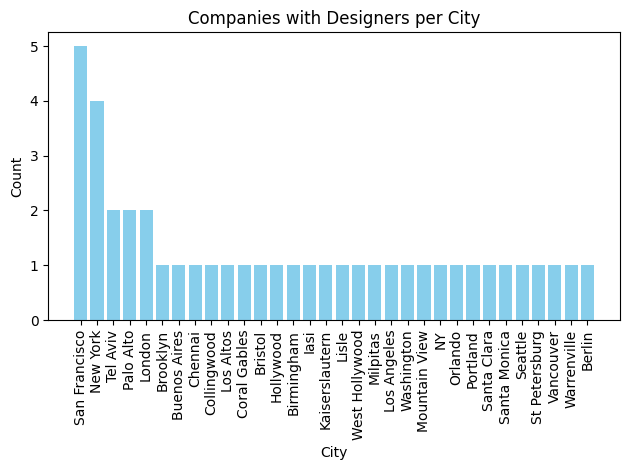

In [7]:
mo.designers_cities_plot(cities,df)

In [8]:
df2=mo.mongo_games_query(c)

In [9]:
df2=mo.cleaning_df2(df2)

In [10]:
game_top_cities=mo.game_cities_df(df2)

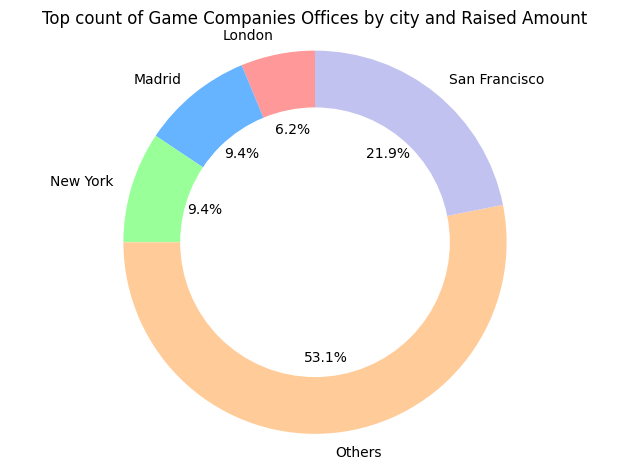

In [11]:
mo.game_cities_plot(game_top_cities)

In [12]:
df3=mo.design_gaming_df(c)

In [13]:
df3=mo.cleaning_df3(df3)

In [14]:
df_sf, df_nyc, df_lon = mo.cities_dfs(df3)

# FOURSQUARE API

In [15]:
df_sf = pd.read_csv("dataframes/df_sanfrancisco.csv")
df_sf = fq.df_foursquare(df_sf, "37.7968917","-122.4032027", "San Francisco") 
df_sf.to_csv("dataframes/df_sanfrancisco.csv", index=False)

In [16]:
df_lon = pd.read_csv("dataframes/df_london.csv")
df_lon = fq.df_foursquare(df_lon, "51.513248",'-0.154738', "London")
df_lon.to_csv("dataframes/df_london.csv", index=False)

In [17]:

df_nyc = pd.read_csv("dataframes/df_newyork.csv")
df_nyc = fq.df_foursquare(df_nyc, '40.7398872','-73.9850319', "New York") 
df_nyc.to_csv("dataframes/df_newyork.csv", index=False)

In [18]:
df=fq.best_locations_df(df_nyc, df_sf, df_lon)

In [19]:
df

,Airport,Preschool,Primary and Secondary School,Train Station,Night Clubs,Vegan Restaurant,Basketball Stadium,Starbucks,Dog Grooming
New York,10447.0,1563.0,841.0,122.0,623.0,356.0,749.0,91.0,2569.0
San Francisco,19161.0,1834.0,693.0,888.0,210.0,203.0,1580.0,257.0,1639.0
London,14166.0,942.0,1910.0,248.0,701.0,316.0,1397.0,241.0,1500.0


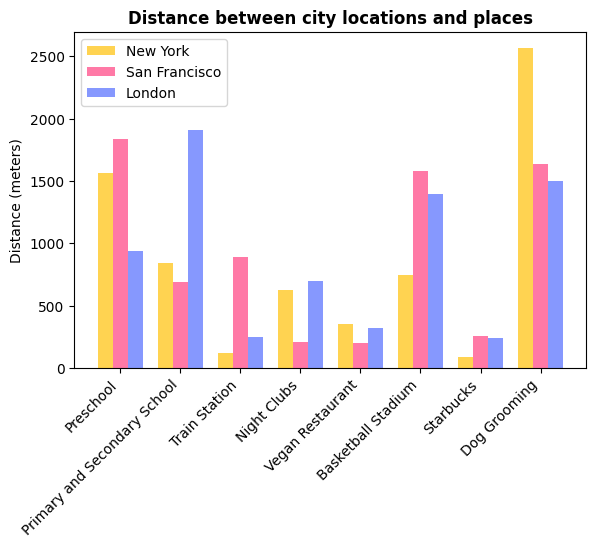

In [20]:
fq.distance_locations_plot(df)

In [21]:
df=fq.closest_distance_points(df)

In [22]:
df

,Airport,Preschool,Primary and Secondary School,Train Station,Night Clubs,Vegan Restaurant,Basketball Stadium,Starbucks,Dog Grooming
New York,2,1,1,2,1,0,2,2,0
San Francisco,0,0,2,0,2,2,0,0,1
London,1,2,0,1,0,1,1,1,2


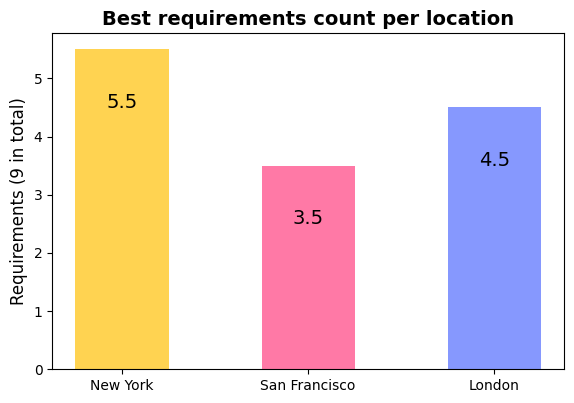

In [23]:
fq.cities_grades_plot(df)

# MAPS

In [24]:
sf_map=mp.creating_map(df_sf, "37.7968917", "-122.4032027", 14)
sf_map

In [25]:
lon_map=mp.creating_map(df_lon, '51.5134019','-0.1566624', 14) 
lon_map

In [26]:
nyc_map=mp.creating_map(df_nyc,'40.7398872','-73.9850319', 14) 
nyc_map